<a href="https://colab.research.google.com/github/andreas31603/MechaineLearningTasks/blob/main/Task3/Task3__Regression_model_Decision_Tree_dan_k_NN__MaterialStrength.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Untuk mengabilkan dataset dari google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Decision Tree

In [2]:
# Import pustaka yang diperlukan
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
# Memuat dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset/MaterialStrength.csv')

In [5]:
# Menampilkan beberapa baris pertama untuk melihat struktur data
print(df.head())

      x1     x2   x3     x4   x5      x6     x7   x8        x9    x10  \
0  540.0    0.0  0.0  162.0  2.5  1040.0  676.0   28  0.300000  540.0   
1  540.0    0.0  0.0  162.0  2.5  1055.0  676.0   28  0.300000  540.0   
2  332.5  142.5  0.0  228.0  0.0   932.0  594.0  270  0.685714  475.0   
3  332.5  142.5  0.0  228.0  0.0   932.0  594.0  365  0.685714  475.0   
4  198.6  132.4  0.0  192.0  0.0   978.4  825.5  360  0.966767  331.0   

        x11  x12       x13  x14  x15  target_feature  
0  1.538462    1  0.350044  YEs   NO           79.99  
1  1.560651    1  0.452416  yES  nOO           61.89  
2  1.569024    0  6.704743  yEs   NO           40.27  
3  1.569024    0  8.891596  yes  NOO           41.05  
4  1.185221    0  8.126411  YeS   no           44.30  


In [6]:
# Step 1: Preprocessing data
# Mengubah fitur kategorikal menjadi numerik menggunakan LabelEncoder
label_encoders = {}
for column in df.columns[:-1]:  # Mengabaikan kolom target ('target_feature')
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le


In [7]:
# Memisahkan fitur (X) dan target (y)
X = df.drop('target_feature', axis=1)
y = df['target_feature']

In [8]:
# Membagi dataset menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Step 2: Melatih model Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)  # Melatih model dengan data latih

DecisionTreeRegressor(random_state=42)

In [10]:
# Step 3: Memprediksi menggunakan model Decision Tree Regressor
y_pred_dt = dt_regressor.predict(X_test)


In [12]:
# Step 4: Evaluasi model Decision Tree Regressor
mae_dt = mean_absolute_error(y_test, y_pred_dt)  # MAE: Rata-rata kesalahan absolut
mse_dt = mean_squared_error(y_test, y_pred_dt)  # MSE: Rata-rata kuadrat kesalahan
rmse_dt = np.sqrt(mse_dt)  # RMSE: Akar dari MSE
r2_dt = r2_score(y_test, y_pred_dt)  # R^2: Koefisien determinasi

print("--- Decision Tree Regressor ---")
print(f"Mean Absolute Error (MAE): {mae_dt}")
print(f"Mean Squared Error (MSE): {mse_dt}")
print(f"Root Mean Squared Error (RMSE): {rmse_dt}")
print(f"R^2 Score: {r2_dt}")


--- Decision Tree Regressor ---
Mean Absolute Error (MAE): 2.3470388349514564
Mean Squared Error (MSE): 20.954405339805824
Root Mean Squared Error (RMSE): 4.577598206462186
R^2 Score: 0.9186795331743481


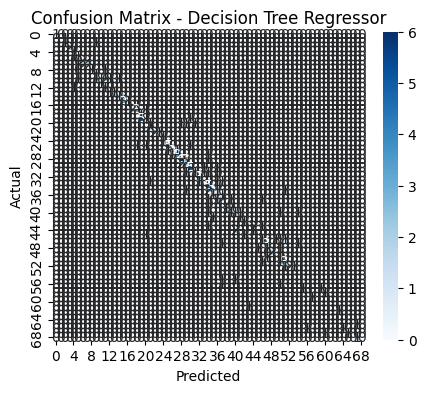

In [13]:
# Membulatkan prediksi untuk membuat Confusion Matrix
y_pred_dt_rounded = np.round(y_pred_dt)
cm_dt = confusion_matrix(np.round(y_test), y_pred_dt_rounded)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Decision Tree Regressor")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

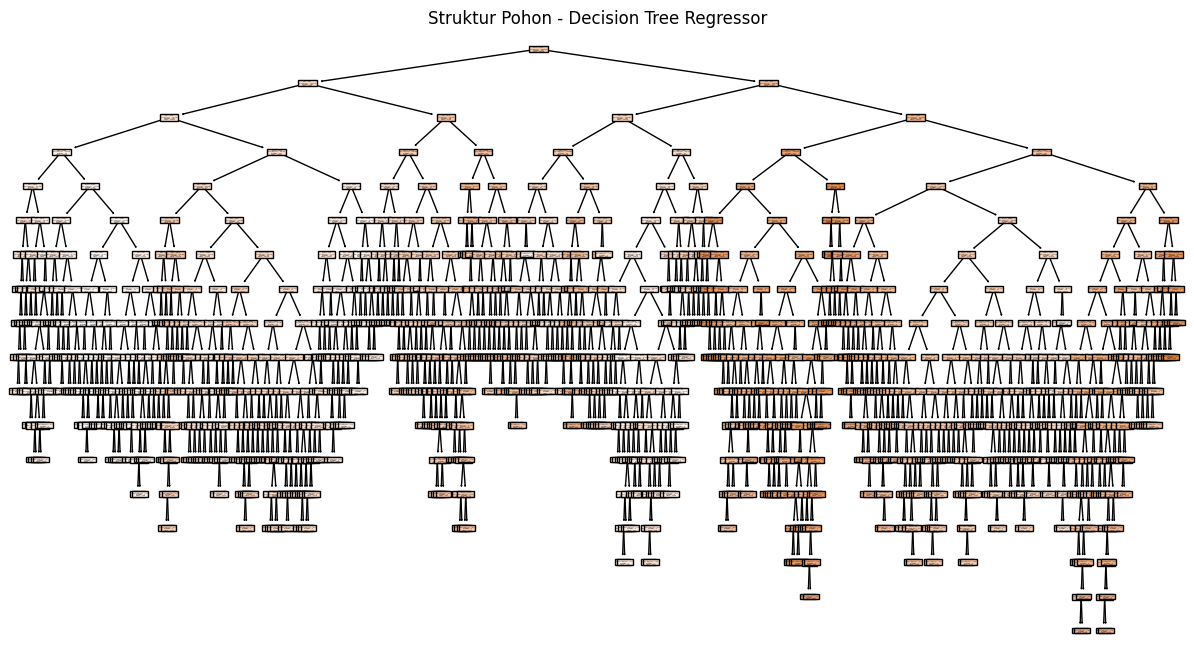

In [14]:
# Visualisasi struktur Decision Tree
plt.figure(figsize=(15, 8))
plot_tree(dt_regressor, feature_names=X.columns, filled=True)
plt.title("Struktur Pohon - Decision Tree Regressor")
plt.show()

## k-Nearest Neighbors (k-NN)

In [15]:
# Import pustaka yang diperlukan
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [16]:
# Memuat dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset/MaterialStrength.csv')

In [17]:
# Menampilkan beberapa baris pertama untuk melihat struktur data
print(df.head())

      x1     x2   x3     x4   x5      x6     x7   x8        x9    x10  \
0  540.0    0.0  0.0  162.0  2.5  1040.0  676.0   28  0.300000  540.0   
1  540.0    0.0  0.0  162.0  2.5  1055.0  676.0   28  0.300000  540.0   
2  332.5  142.5  0.0  228.0  0.0   932.0  594.0  270  0.685714  475.0   
3  332.5  142.5  0.0  228.0  0.0   932.0  594.0  365  0.685714  475.0   
4  198.6  132.4  0.0  192.0  0.0   978.4  825.5  360  0.966767  331.0   

        x11  x12       x13  x14  x15  target_feature  
0  1.538462    1  0.350044  YEs   NO           79.99  
1  1.560651    1  0.452416  yES  nOO           61.89  
2  1.569024    0  6.704743  yEs   NO           40.27  
3  1.569024    0  8.891596  yes  NOO           41.05  
4  1.185221    0  8.126411  YeS   no           44.30  


In [18]:
# Step 1: Preprocessing data
# Mengubah fitur kategorikal menjadi numerik menggunakan LabelEncoder
label_encoders = {}
for column in df.columns[:-1]:  # Mengabaikan kolom target ('target_feature')
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

In [19]:
# Memisahkan fitur (X) dan target (y)
X = df.drop('target_feature', axis=1)
y = df['target_feature']

In [20]:
# Membagi dataset menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Melakukan normalisasi pada fitur untuk k-NN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# Step 2: Melatih model k-NN Regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train_scaled, y_train)  # Melatih model dengan data latih yang dinormalisasi

KNeighborsRegressor()

In [23]:
# Step 3: Memprediksi menggunakan model k-NN Regressor
y_pred_knn = knn_regressor.predict(X_test_scaled)

In [24]:
# Step 4: Evaluasi model k-NN Regressor
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("--- k-NN Regressor ---")
print(f"Mean Absolute Error (MAE): {mae_knn}")
print(f"Mean Squared Error (MSE): {mse_knn}")
print(f"Root Mean Squared Error (RMSE): {rmse_knn}")
print(f"R^2 Score: {r2_knn}")

--- k-NN Regressor ---
Mean Absolute Error (MAE): 7.640679611650485
Mean Squared Error (MSE): 101.2611729708738
Root Mean Squared Error (RMSE): 10.062861072819887
R^2 Score: 0.6070226893214787


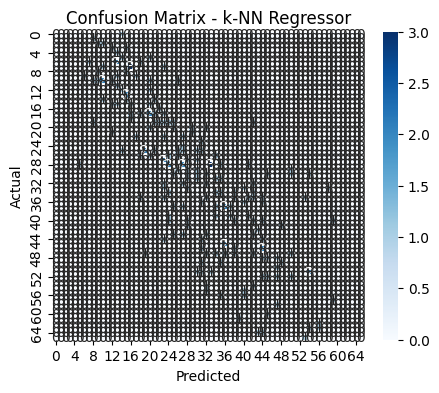

In [25]:
# Membulatkan prediksi untuk membuat Confusion Matrix
y_pred_knn_rounded = np.round(y_pred_knn)
cm_knn = confusion_matrix(np.round(y_test), y_pred_knn_rounded)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - k-NN Regressor")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()